In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
matches.shape

(577, 18)

In [4]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
pd.value_counts(matches['winner'])

Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [7]:
pd.value_counts(matches['toss_decision'])

field    315
bat      262
Name: toss_decision, dtype: int64

In [8]:
pd.value_counts(matches['toss_winner'])

Mumbai Indians                 74
Kolkata Knight Riders          69
Chennai Super Kings            66
Delhi Daredevils               64
Kings XI Punjab                64
Rajasthan Royals               63
Royal Challengers Bangalore    61
Deccan Chargers                43
Sunrisers Hyderabad            30
Pune Warriors                  20
Kochi Tuskers Kerala            8
Gujarat Lions                   8
Rising Pune Supergiants         7
Name: toss_winner, dtype: int64

In [11]:
matches.drop_duplicates('season', keep='last')[['season','winner']]

,season,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad


In [12]:
matches[(matches['winner'] == 'Chennai Super Kings') & (matches['player_of_match'] == 'MS Dhoni')][['team1','team2','player_of_match']]

,team1,team2,player_of_match
14,Chennai Super Kings,Royal Challengers Bangalore,MS Dhoni
27,Delhi Daredevils,Chennai Super Kings,MS Dhoni
84,Chennai Super Kings,Deccan Chargers,MS Dhoni
122,Chennai Super Kings,Kolkata Knight Riders,MS Dhoni
168,Kings XI Punjab,Chennai Super Kings,MS Dhoni
229,Chennai Super Kings,Delhi Daredevils,MS Dhoni
319,Chennai Super Kings,Mumbai Indians,MS Dhoni
354,Sunrisers Hyderabad,Chennai Super Kings,MS Dhoni
362,Chennai Super Kings,Pune Warriors,MS Dhoni
386,Chennai Super Kings,Delhi Daredevils,MS Dhoni


In [13]:
deliveries = pd.read_csv('deliveries.csv')

In [14]:
deliveries.shape

(136598, 21)

In [15]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [16]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [21]:
catchData = deliveries[deliveries['dismissal_kind'] == 'caught']

In [23]:
pd.value_counts(catchData['fielder'])[:10]

KD Karthik        80
SK Raina          79
AB de Villiers    75
RV Uthappa        66
MS Dhoni          66
RG Sharma         60
NV Ojha           59
V Kohli           55
PA Patel          54
DJ Bravo          52
Name: fielder, dtype: int64

In [24]:
pd.value_counts(matches['toss_decision'])

field    315
bat      262
Name: toss_decision, dtype: int64

In [25]:
x = [315,262]
labels = ['field','bat']

([<matplotlib.patches.Wedge at 0x28b29db2208>,
 [Text(-1.0885699188556428, -0.1581629911282012, 'field'),
  Text(1.08856990404735, 0.15816309304747164, 'bat')],
 [Text(-0.593765410284896, -0.08627072243356428, '54.59%'),
  Text(0.5937654022076454, 0.08627077802589361, '45.41%')])

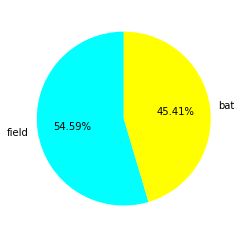

In [30]:
plt.pie(x,labels=labels, startangle=90, autopct='%.2f%%',colors=['cyan','yellow'])

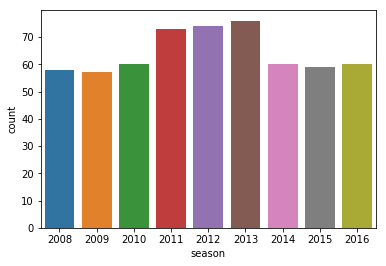

In [31]:
sns.countplot(x=matches['season'])

Text(0.5, 1.0, 'IPL Winners so far')

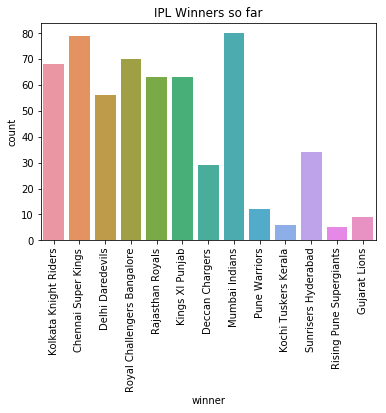

In [34]:
sns.countplot(x=matches['winner'])
plt.xticks(rotation='vertical')
plt.title('IPL Winners so far')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

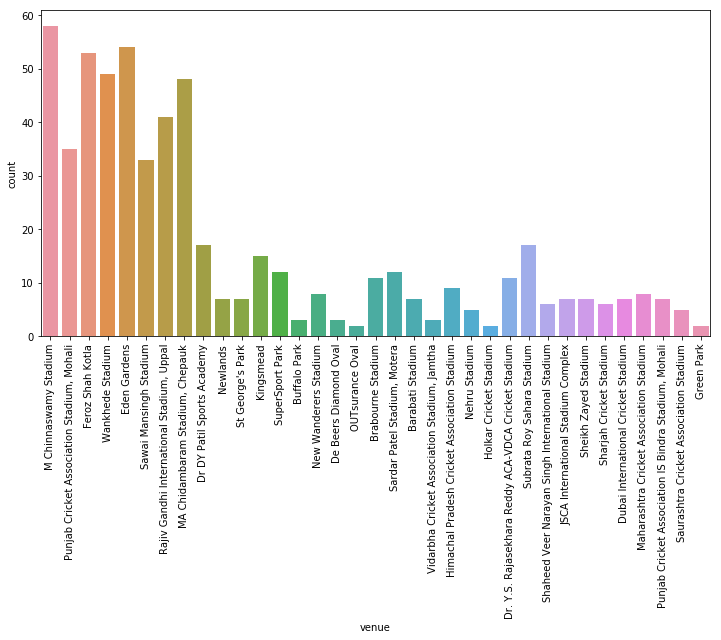

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x=matches['venue'])
plt.xticks(rotation='vertical')